<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Deep-Learning-Architectures" data-toc-modified-id="Deep-Learning-Architectures-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Deep Learning Architectures</a></span><ul class="toc-item"><li><span><a href="#Receptive-Field" data-toc-modified-id="Receptive-Field-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Receptive Field</a></span><ul class="toc-item"><li><span><a href="#Binary-Cross-Entropy-(BCE)" data-toc-modified-id="Binary-Cross-Entropy-(BCE)-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Binary Cross Entropy (BCE)</a></span></li></ul></li><li><span><a href="#Object-Detection-Research-History" data-toc-modified-id="Object-Detection-Research-History-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Object Detection Research History</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Faster-R-CNN:-Towards-Real-Time-Object-Detection-with-Region-Proposal-Networks" data-toc-modified-id="Faster-R-CNN:-Towards-Real-Time-Object-Detection-with-Region-Proposal-Networks-1.2.0.1"><span class="toc-item-num">1.2.0.1&nbsp;&nbsp;</span><a href="https://arxiv.org/abs/1506.01497" target="_blank">Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks</a></a></span></li><li><span><a href="#YOLO-and-SSD" data-toc-modified-id="YOLO-and-SSD-1.2.0.2"><span class="toc-item-num">1.2.0.2&nbsp;&nbsp;</span>YOLO and SSD</a></span></li><li><span><a href="#Focal-Loss-for-Dense-Object-Detection-(RetinaNet)" data-toc-modified-id="Focal-Loss-for-Dense-Object-Detection-(RetinaNet)-1.2.0.3"><span class="toc-item-num">1.2.0.3&nbsp;&nbsp;</span><a href="https://arxiv.org/abs/1708.02002" target="_blank">Focal Loss for Dense Object Detection (RetinaNet)</a></a></span></li><li><span><a href="#In-ResNet,-why-is-bias-usually-set-to-False?" data-toc-modified-id="In-ResNet,-why-is-bias-usually-set-to-False?-1.2.0.4"><span class="toc-item-num">1.2.0.4&nbsp;&nbsp;</span>In ResNet, why is bias usually set to False?</a></span></li><li><span><a href="#How-to-calculate-the-padding-parameter-on-a-conv_layer?" data-toc-modified-id="How-to-calculate-the-padding-parameter-on-a-conv_layer?-1.2.0.5"><span class="toc-item-num">1.2.0.5&nbsp;&nbsp;</span>How to calculate the padding parameter on a conv_layer?</a></span></li></ul></li><li><span><a href="#Bottleneck-to-leverage-1x1-conv" data-toc-modified-id="Bottleneck-to-leverage-1x1-conv-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Bottleneck to leverage 1x1 conv</a></span></li></ul></li></ul></li><li><span><a href="#Adaptive-average-pooling" data-toc-modified-id="Adaptive-average-pooling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Adaptive average pooling</a></span></li></ul></div>

# Deep Learning Architectures

## Receptive Field
L9 [37:20] Why do we care about the idea that we would like each convolutional grid cell to be responsible for finding things that are in the corresponding part of the image? 
Because of the **receptive** field of that convolutional grid cell. 
The basic idea is that t
Throughout the convolutional layers, every piece of those tensors has a receptive field, a part of the input image that was "responsible" for calculating that cell. 

See this with Excel [38:01]. 
Take a single activation (here in the maxpool layer) and see where it came from [38:45]. 
In excel you can do Formulas → Trace Precedents. 
Tracing all the way back to the input layer, it came from a 
6 x 6 portion of the image (and filters). 
Moreover, the middle portion has lots of weights coming out, 
but cells in the outside only have one weight coming out. 
We call the 6 x 6 cells the *receptive field* of the one activation we picked. 
Note that the receptive field is not only identifying the 6x6 box,
but also that the center of the box has more dependencies [40:27] 
This is a critically **important concept** to understand why conv nets work the way they do.

###   Binary Cross Entropy (BCE)
From L9 1:05 
Binary cross entropy is what we normally use for multi-label classification. 
Like in the planet satellite competition, each satellite image could have multiple things. If it has multiple things in it, you cannot use softmax (because it encourages just one thing). 
In pascal-multi, each anchor box can only have one object associated with it, 
so it is not for that reason that we are avoiding softmax. 
It is something else — it is possible for an anchor box to have nothing associated with it. 
There are two ways to handle this idea of “background”; 

1. background is just a class.
Let’s use softmax and just treat background as one of the classes that the softmax could predict. 
Many people have done it this way. 
But is a really hard thing to ask a NN to do [1:06:52] — 
it is basically asking whether this grid cell does not have 
any of the (e.g., 20) objects that I am interested with Jaccard overlap of more than 0.5. It is a really hard to thing to put into a single computation. 
2. ask for each class and if it is neither, it is background
We just ask for each class; “is it a motorbike?” “is it a bus?”, “ is it a person?” etc. 
If all the answers are no, consider that background. 
That is the way we do it here. 

It is not that we can have multiple true labels, but that we can have zero.

In [2]:
#from IPython.display import Image
#Image(url='https://cdn-images-1.medium.com/max/1400/1*bQPvoI0soxtlBt1cEZlzcQ.png')

## Object Detection Research History
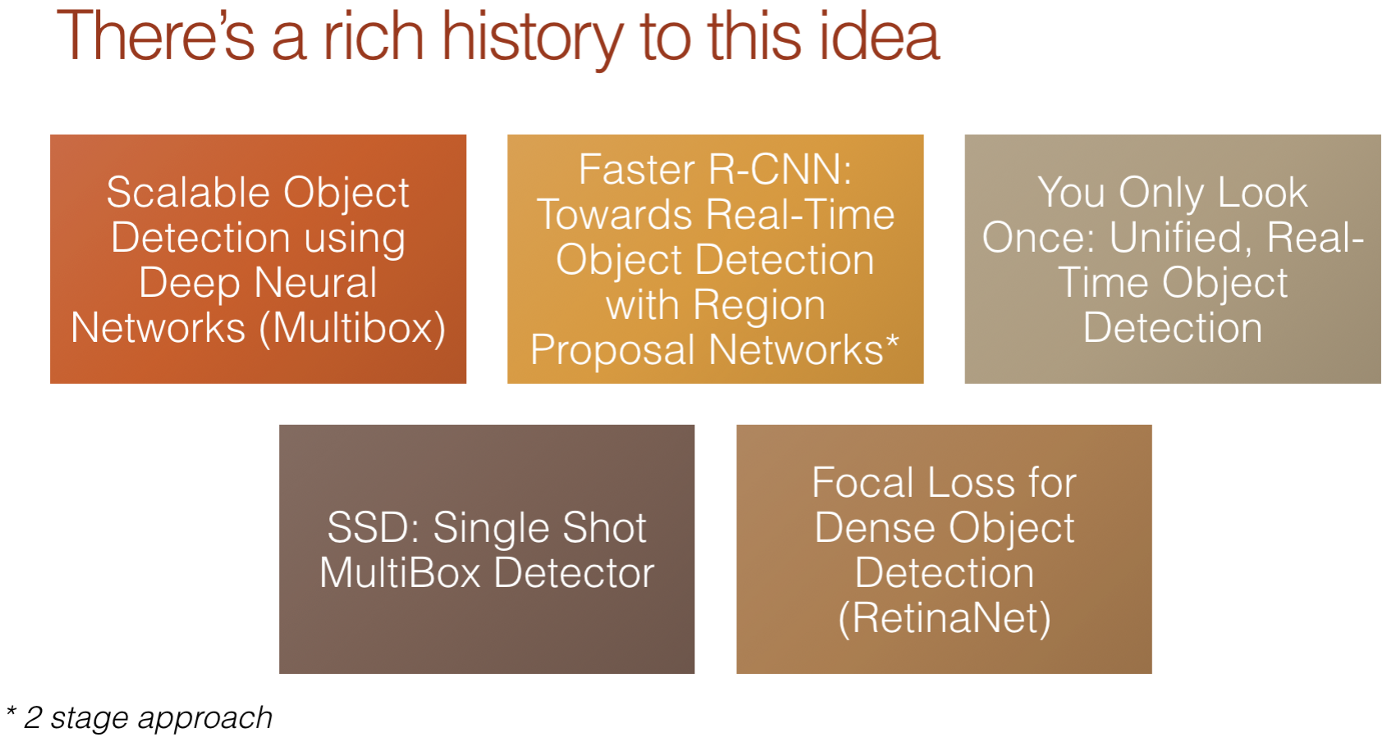

#####  [Scalable Object Detection using Deep Neural Networks](https://arxiv.org/abs/1312.2249)
The **multi-box method**, refers to this (Google) paper from Dec 2013. 
They introduced the idea that we can have a loss function that has a "matching" process and can be used to do object detection. 
Since then people have been trying to make this better.

#### [Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks](https://arxiv.org/abs/1506.01497)
Ross Girshick (et al) (FAIR) went down a different direction in this 2015 article. 
He had a two-stage process.
The first stage used classical CV approaches to find edges and changes of gradients to guess which parts of the image may represent distinct objects. 
The 2nd stage fit each of those into a CNN designed to figure out if that is the kind of object they are interested in. 
R-CNN and Fast R-CNN are hybrids of traditional CV and DL. 
They took the multibox idea and replaced the traditional CV of their 2-stage process with the convnet. 
So now they have two conv nets: one for region proposals (all of the things that might be objects) and the second part was the same as his earlier work.

####  YOLO and SSD
[You Only Look Once: Unified, Real-Time Object Detection](https://arxiv.org/abs/1506.02640)

[SSD: Single Shot MultiBox Detector](https://arxiv.org/abs/1512.02325)

At similar time (2015) - the YOLO (U. of Washington) and SSD (Google) papers came out. 
Both of these did something pretty cool which is they achieved similar performance as the Faster R-CNN but with 1 stage. 
They took the multibox idea and they tried to figure out how to deal with messy outputs. The basic ideas were to use, for example, hard negative mining where they would go through and find all of the matches that did not look that good and throw them away, use very tricky and complex data augmentation methods, and other hackery. 
But they got them to work pretty well.

SSD and YOLO were the first single-pass good quality object detection method that come along. 
Often in DL history, things that involve multiple passes of multiple different pieces, particularly where they involve some non-DL pieces (like R-CNN did), over time, they always get turned into a single end-to-end DL model. 
So when that happens people have figured out how to show this as a DL model. 
Then they do something much faster and much more accurate. 

The model is 4 paragraphs. 
The papers are concise, read them carefully. 
Need to be selective, e.g., ignore the parts of “prove the error bounds,” but focus on the model carefully.
Read section 2.1 Model 1:56:37 and also Matching strategy and Training objective (a.k.a. Loss function)2:01:44

####  [Focal Loss for Dense Object Detection (RetinaNet)](https://arxiv.org/abs/1708.02002)
In this 2017 paper, the authors from Facebook (FAIR) realized why the "messy thing" wasn’t working. 
When we look at an image, there are 3 different granularities of convolutional grid (4x4, 2x2, 1x1) [1:37:28]. 
The 1x1 is quite likely to have a reasonable overlap with some object because most photos have some kind of main subject. 
On the other hand, in the 4x4 grid cells, most of the (eg 16) anchor boxes are not going to have much of an overlap with anything. 
So if somebody says “what do you reckon this little clip is?” and you are not sure, you will say “background” because most of the time, it is the background.

Below from https://cdn-images-1.medium.com/max/1400/1*6Bood7G6dUuhigy9cxkZ-Q.png
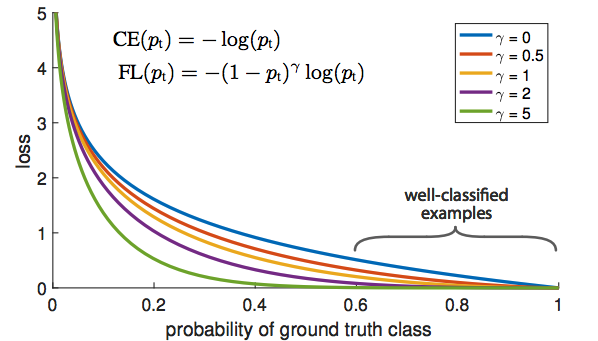

The key thing is this first picture. 
The blue line is the binary cross entropy loss. 
If the answer is not a motorbike [1:41:46], and I said “I think it’s not a motorbike and I am 60% sure” with the blue line, the loss is still about 0.5 which is pretty bad. 
So if we want to get our loss down, then for all these things which are actually background, we have to be saying “I am sure that is background”, “I am sure it’s not a motorbike, or a bus, or a person” — because if I don’t say we are sure it is not any of these things, then we still get loss....

That is why the motorbike example did not work [1:42:39]. 
Because even when it gets to lower right corner and it wants to say “I think it’s a motorbike”, 
there is no payoff for it to say so. 
If it is wrong, it gets killed. 
And the vast majority of the time, it is background. 
Even if it is not background, it is not enough just to say “it’s not background” —  
you have to say which of the 20 things it is.

So the trick is to find a different loss function [1:44:00] that looks more like the green or the purple line. 
Focal loss is literally just a scaled cross entropy loss. 
Now if we say “I’m .6 sure it’s not a motorbike” then the loss function 
will say “good for you! no worries” [1:44:42].

The game-changing **contribution** of this paper is to add **$(1−pt)^γ$** to the start of the equation [1:45:06]. 
Seems like nothing but people have been trying to figure out this problem for years. 
Very often a major contribution is just one line of code, or the change of a single constant, or adding log to a single place.

Good things about this paper [1:46:08]:
- Equations are written in a simple manner, e.g., CE(p, y)
- They “refactor”

Why alpha and gamma are 0.25 and 2 (1?), 
because the authors tried lots of different values and found that these work well.
From https://cdn-images-1.medium.com/max/1400/1*qFPRvFHQMQplSJGp3QLiNA.png'
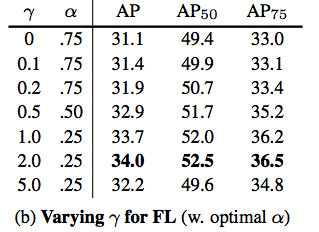

In [2]:
#from IPython.display import Image
#Image(url='https://cdn-images-1.medium.com/max/1400/1*qFPRvFHQMQplSJGp3QLiNA.png')

#### In ResNet, why is bias usually set to False? 
Question: In ResNet, why is bias usually set to False in conv_layer [19:53]? <br>
A: Immediately after the Conv, there is a BatchNorm. 
Remember, BatchNorm has 2 learnable parameters for each activation — the thing you multiply by and the thing you add. If we had bias in Conv and then add another thing in BatchNorm, we would be adding two things which is pointless — i.e., 2 weights where 1 would do. 
So if you have a BatchNorm after a Conv, we can either tell BatchNorm not to include the add bit,
or easier is to tell Conv not to include the bias. 
There is no particular harm, but takes more memory because that is more gradients to keep track of, so best to avoid.

#### How to calculate the padding parameter on a conv_layer?
A. Most conv_layers have padding as a parameter [21:11]. 
We should be able to calculate the padding easily. 
If the kernel is of size 3, then is going to overlap by one unit on each side, so we want padding of 1. 
If it’s kernel size of 1, then we don’t need any padding. 
So in general, padding of kernel size “integer divided” by 2 is what we need. 
There’re some tweaks sometimes but in this case, this works perfectly well. 
Try simplifying code by having the computer calculate stuff.. 

### Bottleneck to leverage 1x1 conv

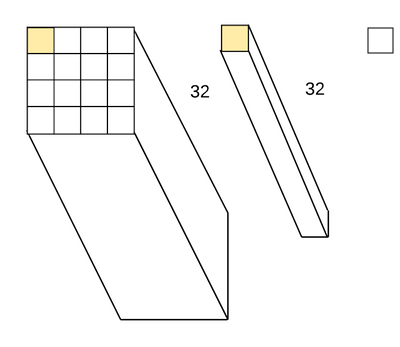
(https://cdn-images-1.medium.com/max/2000/1*Pc3_ut-tOnPm5FLdYqRrOA.png)

Another thing with the two conv_layer’s [22:14]: 
We had this idea of bottleneck (reducing the channels and then increase them again), 
there is also what kernel size to use. 
The first one has 1 by 1 Conv. 
What actually happen in 1 by 1 conv? 
If we have 4 by 4 grid with 32 filters/channels and we will do 1 by 1 conv, 
the kernel for the conv looks like the one in the middle. 
When we talk about the kernel size, we never mention the last piece — but let’s say it’s 1 by 1 by 32 because that’s the part of the filters in and filters out. 
The kernel gets placed on the first cell in yellow and we get a dot product these 32 deep bits which gives us our first output. 
We then move it to the second cell and get the second output. 
So there will be bunch of dot products for each point in the grid. 
It is allowing us to change the dimensionality in whatever way we want in the channel dimension. 
We are creating `ni//2` filters and we will have `ni//2` dot products which are basically different weighted averages of the input channels. 
With very little computation, it lets us add this additional step of calculations and nonlinearities. 
It is a cool trick to take advantage of these 1 by 1 convs, creating this bottleneck, and then pulling it out again with 3 by 3 convs — which will take advantage of the 2D nature of the input properly. 
Or else, 1 by 1 conv doesn’t take advantage of that at all.

In [5]:
#from IPython.display import Image
#Image(url='https://cdn-images-1.medium.com/max/2000/1*Pc3_ut-tOnPm5FLdYqRrOA.png') 

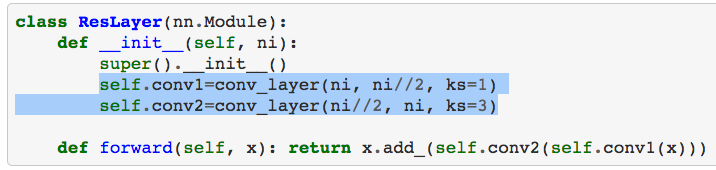
From https://cdn-images-1.medium.com/max/2000/1*Pc3_ut-tOnPm5FLdYqRrOA.png

The highlited 2 lines of code are a good test of our understanding and intuition [25:17] — 
Why does it work? why do the tensor ranks line up? 
why do the dimensions all line up nicely? 
why is it a good idea? what is it really doing? 

TODO: Create some small ones in a Jupyter Notebook, run them yourself, see what inputs and outputs come in and out. Really get a feel for that. 
Once you’ve done so, you can then play around with different things.

A really unappreciated papers is [26:09] — [Wide Residual Networks](https://arxiv.org/abs/1605.07146). 
They fiddle with these two lines of code:

- What if we did ni*2 instead of ni//2?
- What if we added conv3?

They came up with a simple notation for defining what the two lines of code can look like and show experiments. 
They show that the approach of bottlenecking of decreasing the number of channels, 
which is almost universal in ResNet, is, based on their experiments,  **not a good idea**. 
Because it lets you create really deep networks. 
The Resnet guys got famous for creating a 1001 layer network. 
But ... any such deep network is sequential, as we can’t calculate layer $i$ until we are finished with layer $i-1$. 
GPUs don’t like sequential. 
Better have fewer layers but with more calculations per layer.
An easy way to do that would be to remove the `//2`, no other changes:

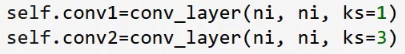

Try running CIFAR and see what happens. 
Even multiply by 2 or fiddle around. 
That lets your GPU do more work and it’s very interesting because the vast majority of papers that talk about performance of different architectures never actually time how long it takes to run a batch through it. 
They say “this one takes X number of floating-point operations per batch” but they never actually bother to run it like a proper experimentalists and find out whether it’s faster or slower. 
A lot of the architectures that are really famous now turn out to be slow and take loads of memory, 
because they never bothered to evaluate whether they are fast and to actually 
see whether they fit in RAM with normal batch sizes. 
The Wide ResNet paper is unusual in that it actually times how long it takes as does the YOLO v3 paper which made the same insight. 
The YOLO v3 paper came to the same conclusions.  
It is great to see people are actually timing things and noticing what actually makes sense.

# Adaptive average pooling 

L12 [35:02]
NB: Nobody uses adaptive average pooling. 
Everyone writes nn.AvgPool2d(n) where n is a particular number.
Hence it is now tied to a particular image size which is not what we want. 
Most people think that a specific architecture is tied to a specific size. 
That is a problem, because it limits their ability to use smaller sizes,
or to kick-start their modeling or to use smaller size for doing experiments.

Explain adaptive average pooling: How does setting to 1 work [37:25]? 
Lets look first at **average** pooling: 
Let’s say we have 4x4 and we did avgpool((2, 2)) [40:35]. 
That creates 2x2 area (blue in the below) and takes the average of those four. 
If we pass in stride=1, the next one is 2x2 shown in green and take the average. 
So this is what a normal 2x2 average pooling would be. If we didn’t have any padding, that would spit out 3x3. If we wanted 4x4, we can add padding.

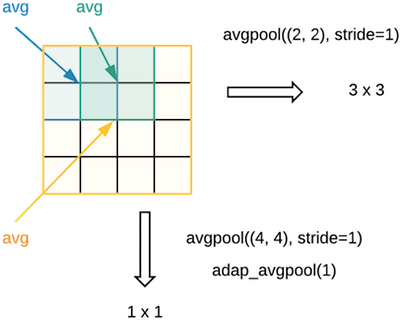

What if we wanted 1x1? 
Then we could say avgpool((4,4), stride=1) that would do 4x4 in yellow and average the whole lot which results in 1x1. 
But that’s just one way to do it. 
Rather than saying the size of the pooling filter, 
we prefer not to care what the size of the input grid is. 
We just want the output to be 1x1.  
That is what `adap_avgpool(1)` does. 
No need to say anything about the size of the pooling filter, 
just states the size of the output we want. 
If you have a single integer $n$, it assumes you mean $n by n$. 

In this case, adaptive average pooling 1 with a 4x4 grid coming in is the same as average pooling (4, 4). 
If it was 7x7 grid coming in, it would be the same as average pooling (7, 7). 
It is the same operation, but expressing it in a way that regardless of the input, 
we state what we want of the output.

Question: Shouldn’t we use a sigmoid if we want values between 0 and 1 [1:25:06]? As usual, our images have been normalized to have a range from -1 to 1, so their pixel values don’t go between 0 and 1 anymore. This is why we want values going from -1 to 1 otherwise we wouldn’t give a correct input for the discriminator (via this post).